student performance indicator
Life cycle of Machine Learning Project
1.understanding the data
2.collecting the data
3.Data checks to perform
4.Exploratory Data Analysis
5.Data Pre-processing
6.Model Training
7.choose the best model

1)Understanding the data
     the project understands the how the test scores affect the other variables such as 
     gender,race/ethnicity,parental level of education,lunch,test preparation course

2)Collecting the data
     Data source- https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
     the data consist of 8 columns and 1000 rows 

# Importing data and Requrired Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('data/stud.csv')

In [4]:
#make a copy for the data
data_copy=data.copy

# 2)Checking the information about the data

In [5]:
#checking the shape of the data
data.shape

(1000, 8)

In [6]:
#checking the columns of the data
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

showing a top 5 rows in the data

In [7]:
data.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# 3)Data checks to perform
-checking missing values
-check duplicates
-check data types
-check the unique values from the each column
-checks statistics of the dataset
-check various categories present in the different categorial column

In [8]:
#checking missing values
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

there is no missing values in this data

In [9]:
#checking duplicates
data.duplicated().sum()

np.int64(0)

there is no duplicated values in the data

In [10]:
#checking the types of the columns
data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [11]:
#check the unique values from the each column
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [12]:
#getting the unique values from the data
for i in data.columns:
    if data[i].dtypes!='int':
        unique_values=data[i].unique()
        print(unique_values)

['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']


In [13]:
#checks statistics of the dataset
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insight:
-from the above description of numerical data all the means are very close to each other-between 66 to 68
-all the standard deviations are very  close to ech other -between 14.60 to 15.19
-the minimum score of the maths is 0 ,writing score is 10 and the reading score is 17    

In [14]:
#define a numerical and catogerical column
cat_data=data.select_dtypes("object")
num_data=data.select_dtypes("int","float")

In [15]:
cat_data

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none
...,...,...,...,...,...
995,female,group E,master's degree,standard,completed
996,male,group C,high school,free/reduced,none
997,female,group C,high school,free/reduced,completed
998,female,group D,some college,standard,completed


In [16]:
num_data

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


# Adding columns for "Total score" and "Average"


In [17]:
data['Total_score']=data['math score']+data['reading score']+data['writing score']
data["Average"]=data['Total_score']/3

In [18]:
data.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


# univariente analysis

<Axes: xlabel='count', ylabel='gender'>

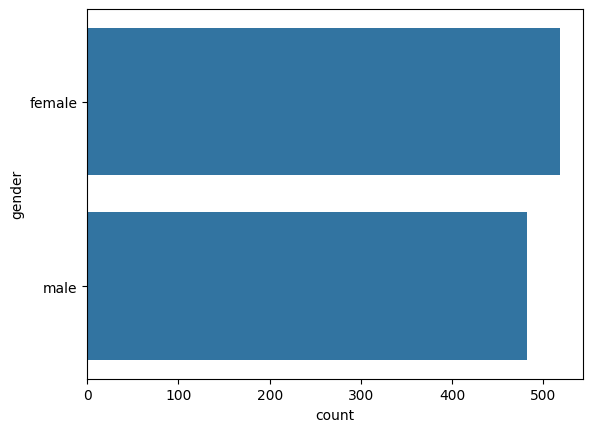

In [19]:

sns.countplot(cat_data['gender'])

Insight:
in this data set we have a more female students comparing to the male students

<Axes: xlabel='count', ylabel='lunch'>

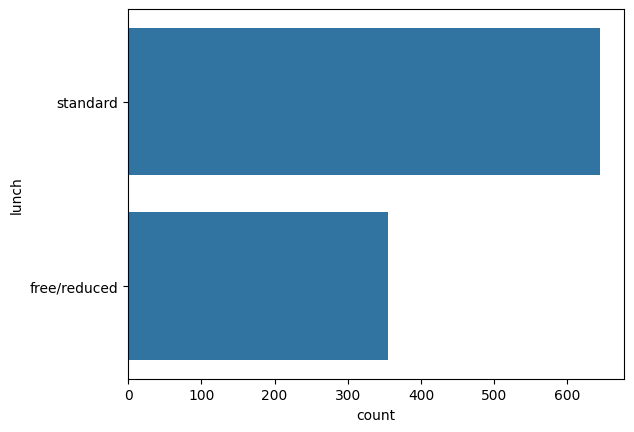

In [20]:
sns.countplot(cat_data['lunch'])

Insight:
above 600 students have the standard lunch

<Axes: xlabel='count', ylabel='parental level of education'>

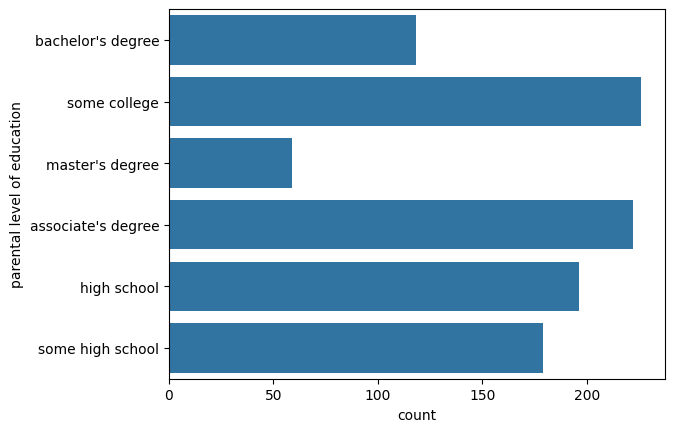

In [21]:
sns.countplot(cat_data['parental level of education'])

Insight:
-most of the parents studyed some college and associate's degree
-less number of parents completed our master's degree

<Axes: xlabel='count', ylabel='race/ethnicity'>

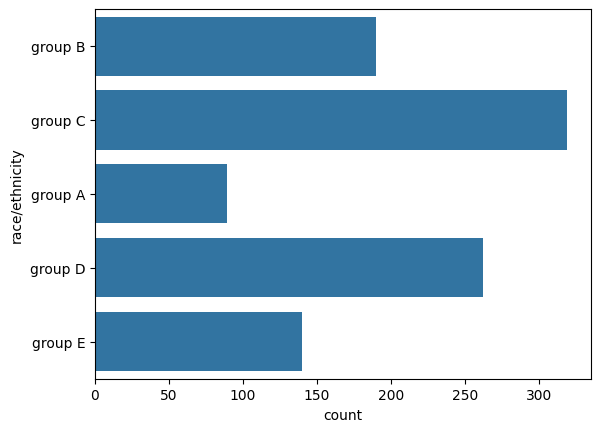

In [22]:
sns.countplot(cat_data['race/ethnicity'])

Insight:
most of the students are group c students

<Axes: xlabel='count', ylabel='test preparation course'>

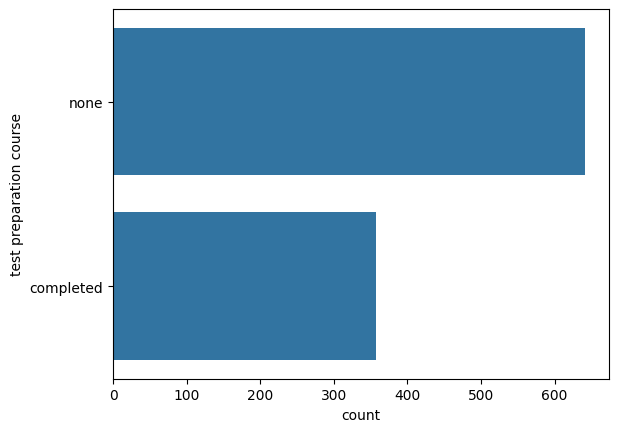

In [23]:
sns.countplot(cat_data['test preparation course'])

Insight:
most of the students not completed test preparation course

<Axes: xlabel='Average', ylabel='Count'>

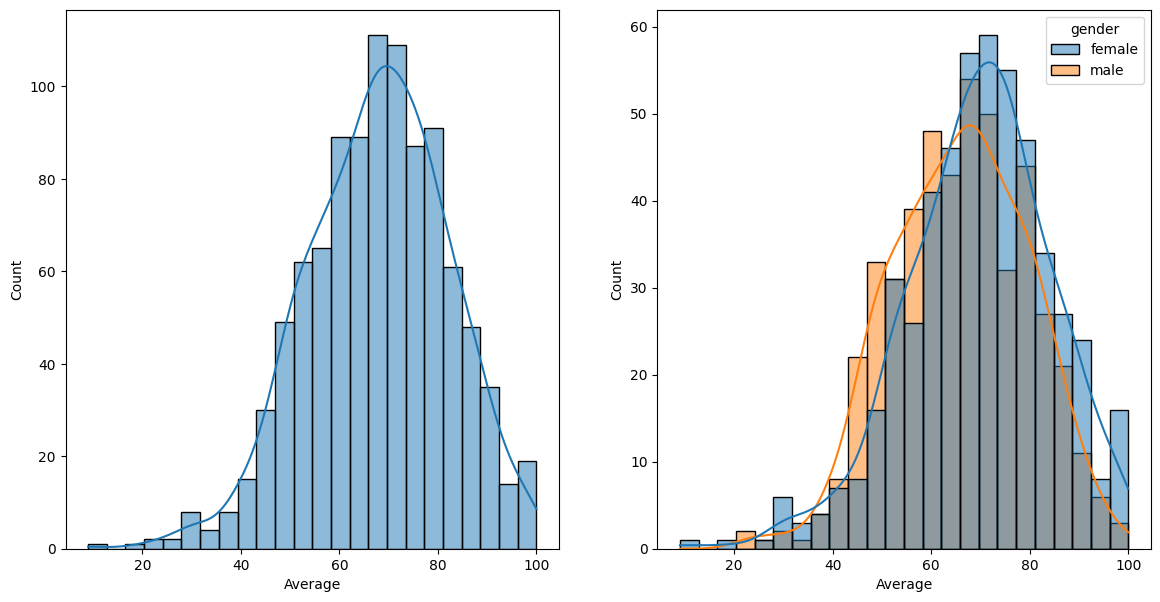

In [24]:
fig,ax=plt.subplots(1,2,figsize=(14,7))
plt.subplot(121)
sns.histplot(data=data,x='Average', kde=True)
plt.subplot(122)
sns.histplot(data=data,x="Average",kde=True,hue="gender")

Insight:
female students are performed well in the exams than male students

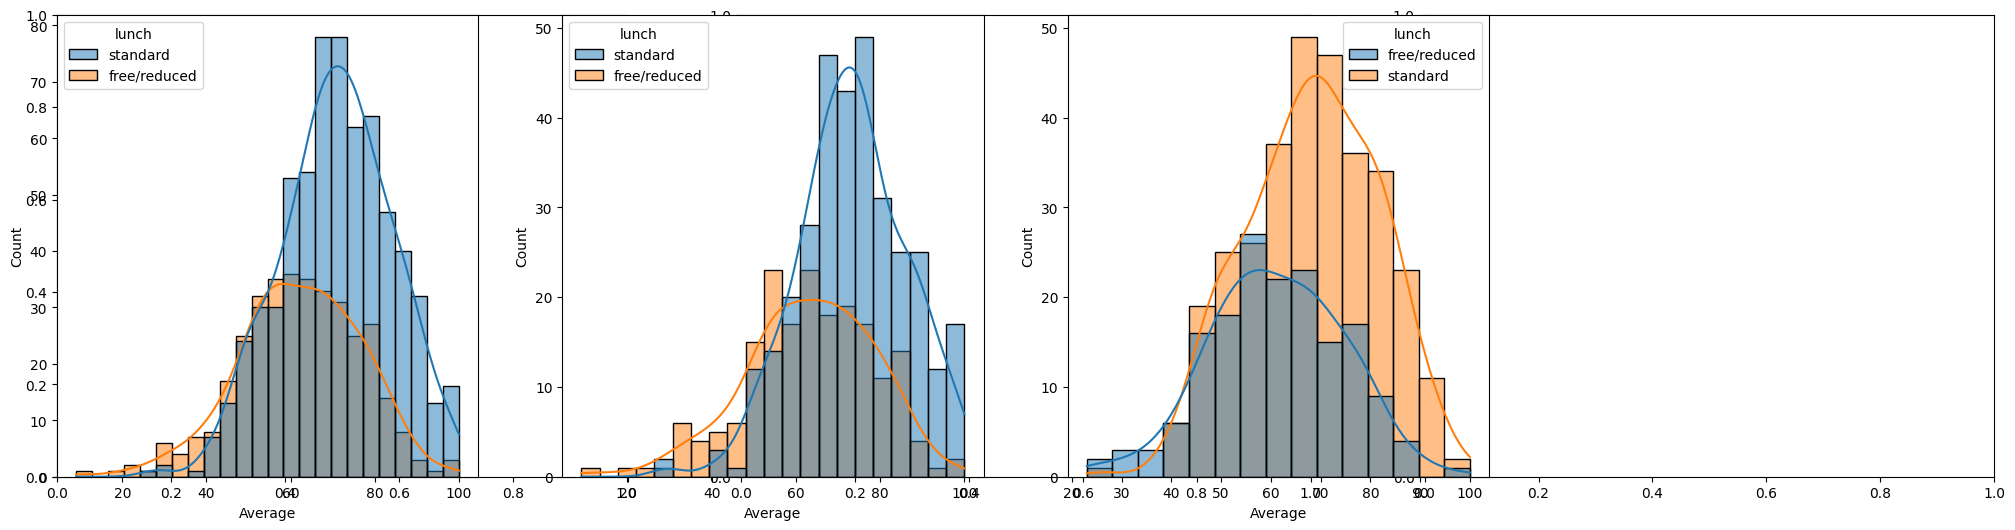

In [25]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=data,x='Average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=data[data.gender=='female'],x='Average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=data[data.gender=='male'],x='Average',kde=True,hue='lunch')
plt.show()


Insight:
-Standard lunch helps perform well in exams.
-Standard lunch helps perform well in exams be it a male or a female.

# Bivariente and multivarients

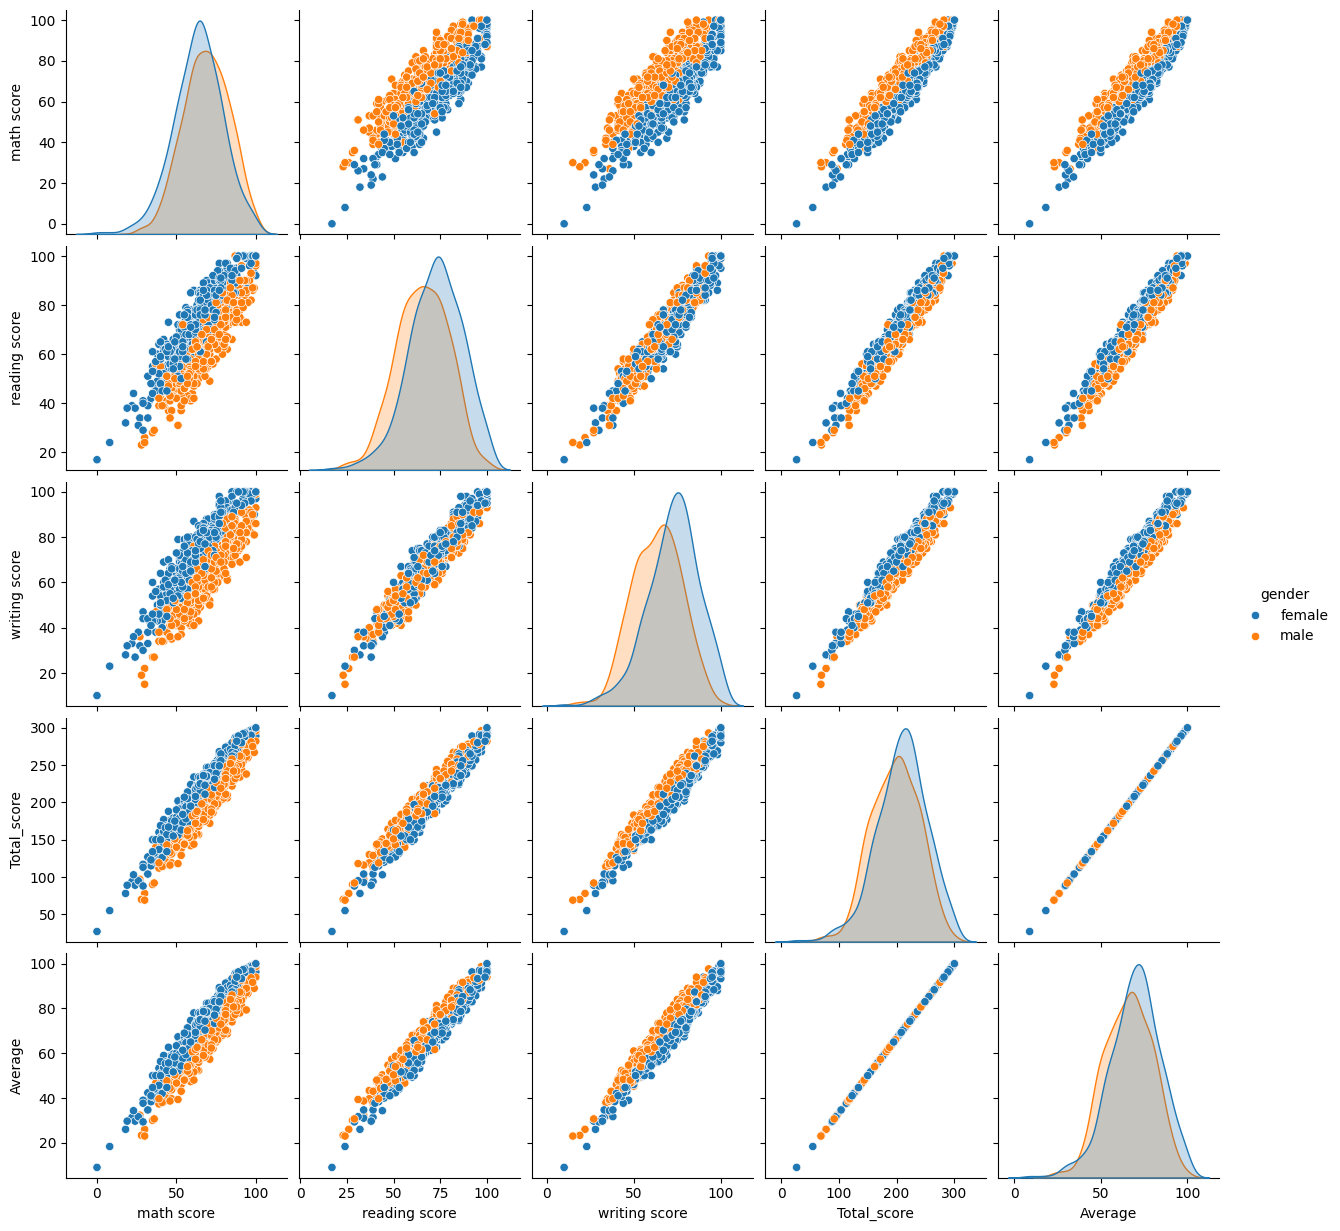

In [26]:
#pairplot
sns.pairplot(data,hue="gender")

Insight:
In above the pairplot all the scores increase linearly with each other

In [27]:
num_data=data.select_dtypes(['int','float'])

In [28]:
#checking the correlation between the numerical columns
num_data.corr()

,math score,reading score,writing score,Total_score,Average
math score,1.000000,0.817580,0.802642,0.918746,0.918746
reading score,0.817580,1.000000,0.954598,0.970331,0.970331
writing score,0.802642,0.954598,1.000000,0.965667,0.965667
Total_score,0.918746,0.970331,0.965667,1.000000,1.000000
Average,0.918746,0.970331,0.965667,1.000000,1.000000


Insight:
-the total_score and Average are highly correlated with each other



<Axes: >

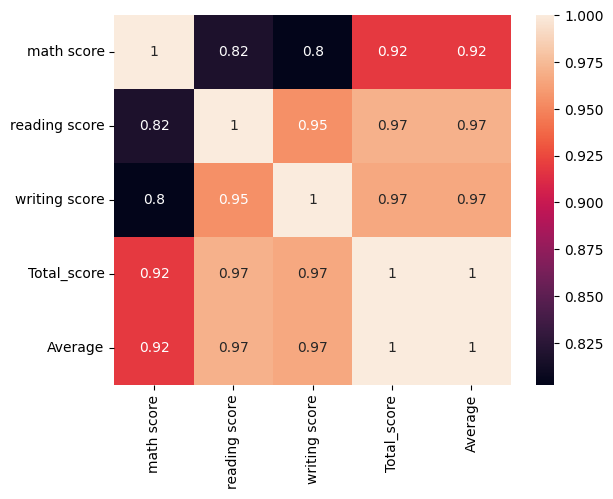

In [29]:
sns.heatmap(num_data.corr(),annot=True)

Insight:
-the total_score and Average are highly correlated with each other


# checking outliers

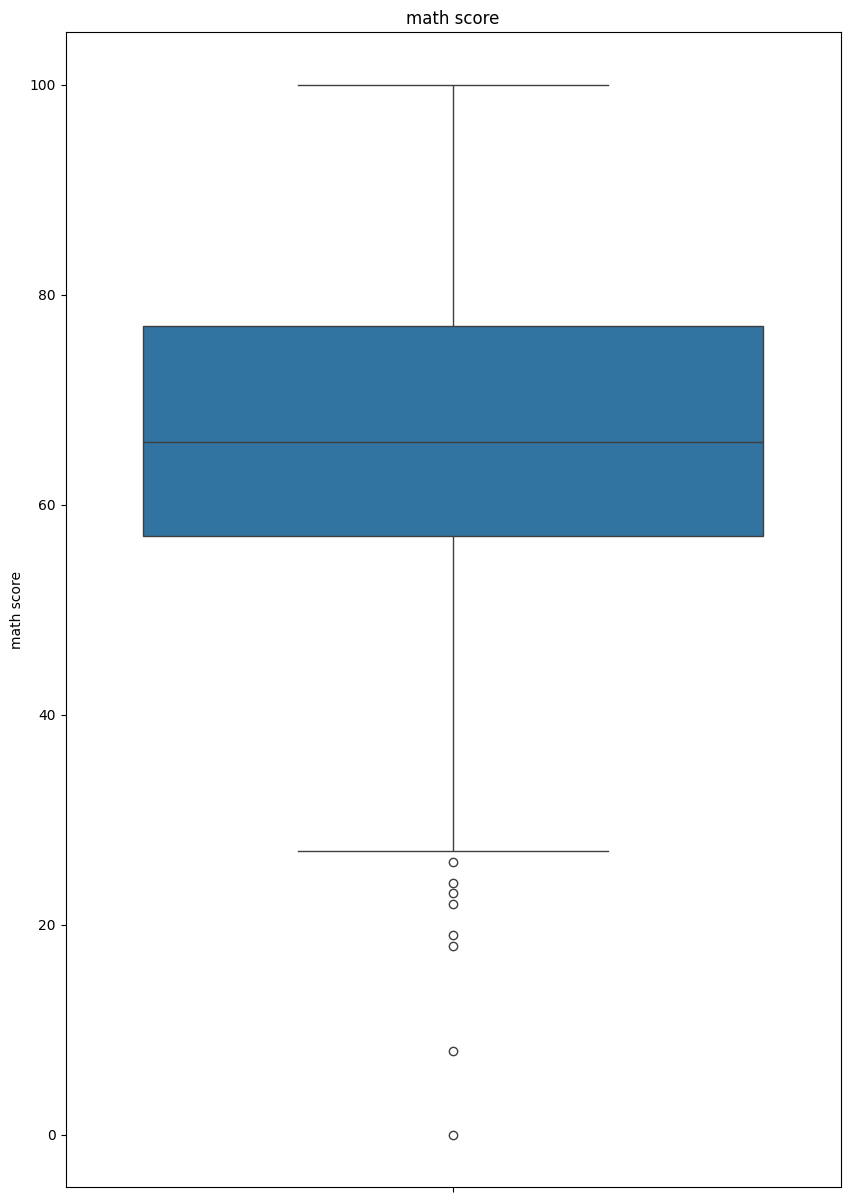

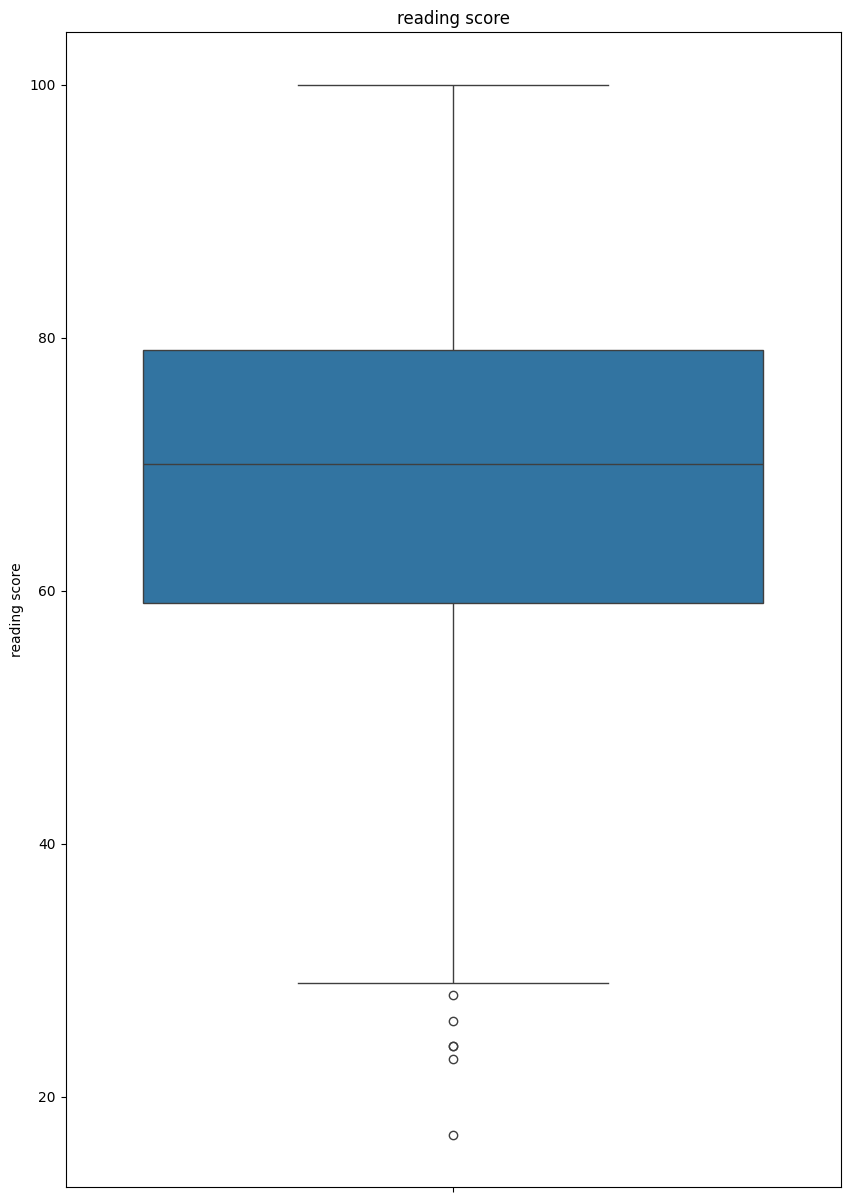

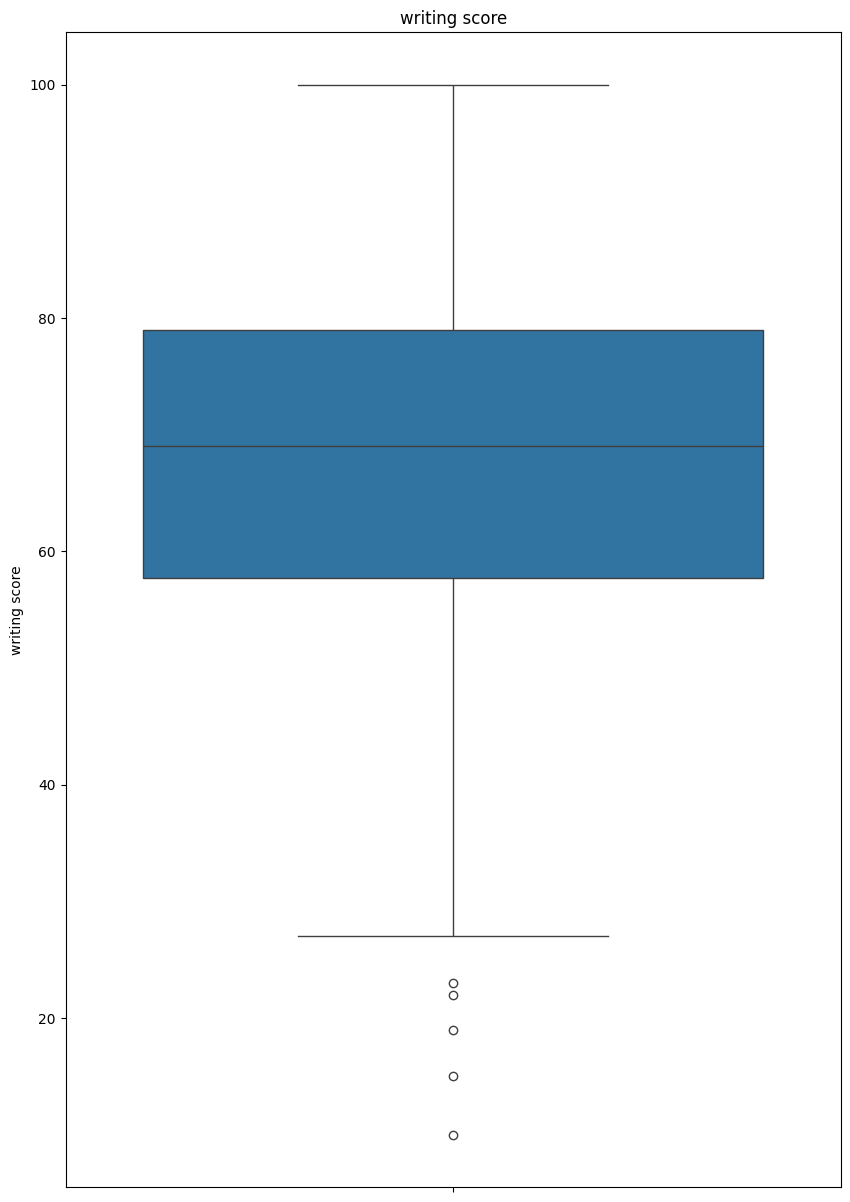

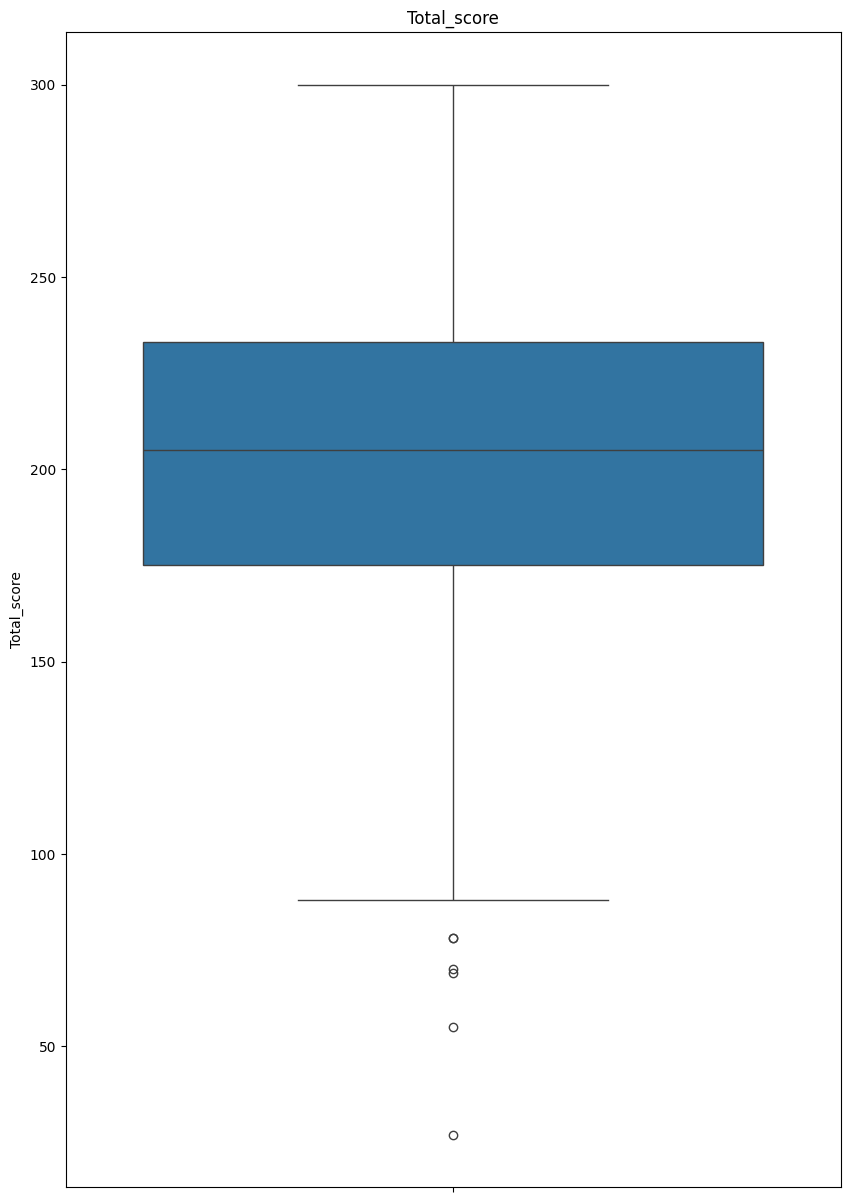

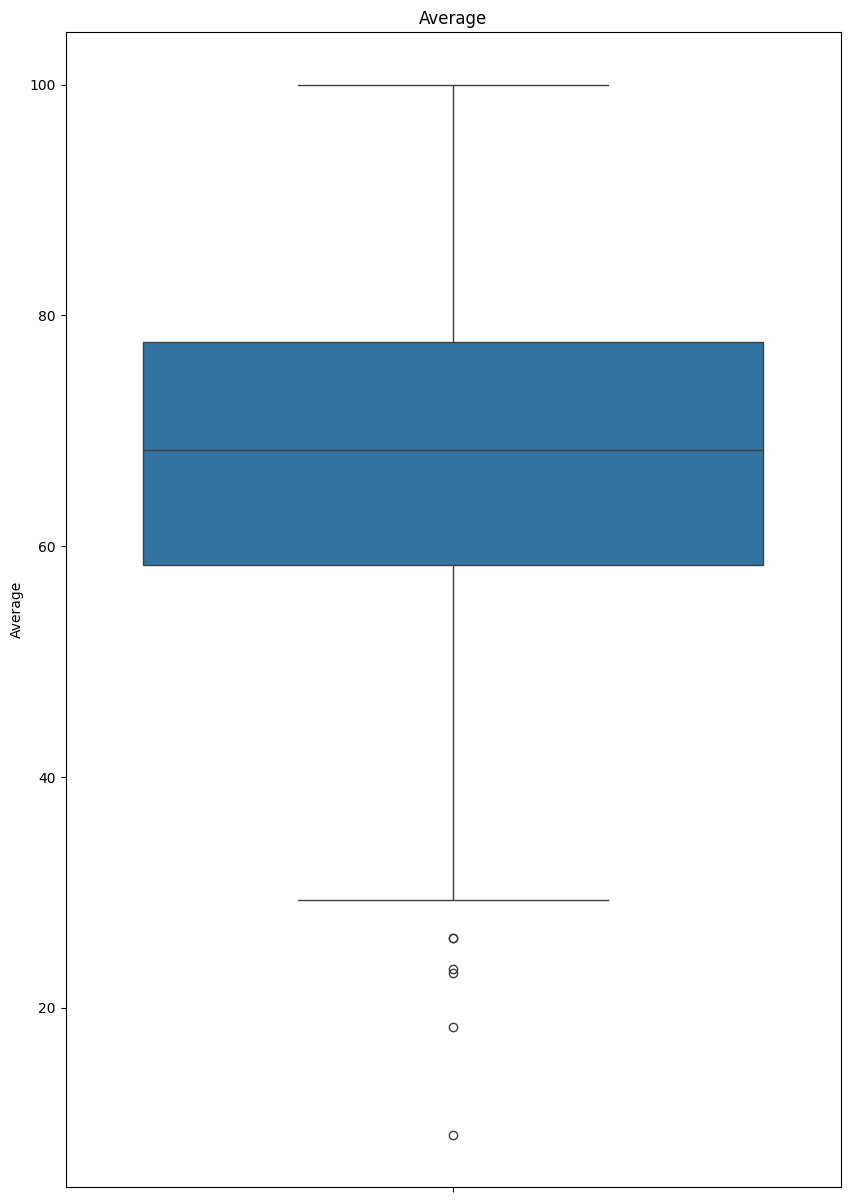

In [30]:

for i in num_data.columns:
    plt.figure(figsize=(10,15))
    plt.title(i)
    sns.boxplot(num_data[i])

Insight:
we have the outliers in this data set

# Treating the outliers

In [58]:
q1,q3=np.percentile(num_data,[25,75])

q1-25% of the data
q3-75% of the data

In [59]:
print(q1)

61.0


In [36]:
print(q3)

90.0


In [61]:
iqr=q3-q1
print(iqr)

29.0


In [62]:
lower_fence=q1-(1.5*iqr)
higher_fence=q3+(1.5*iqr)
print(lower_fence)
print(higher_fence)

17.5
133.5


Insight:
the lower range of the data set is 17.5
the higher range of the data set is 133.5

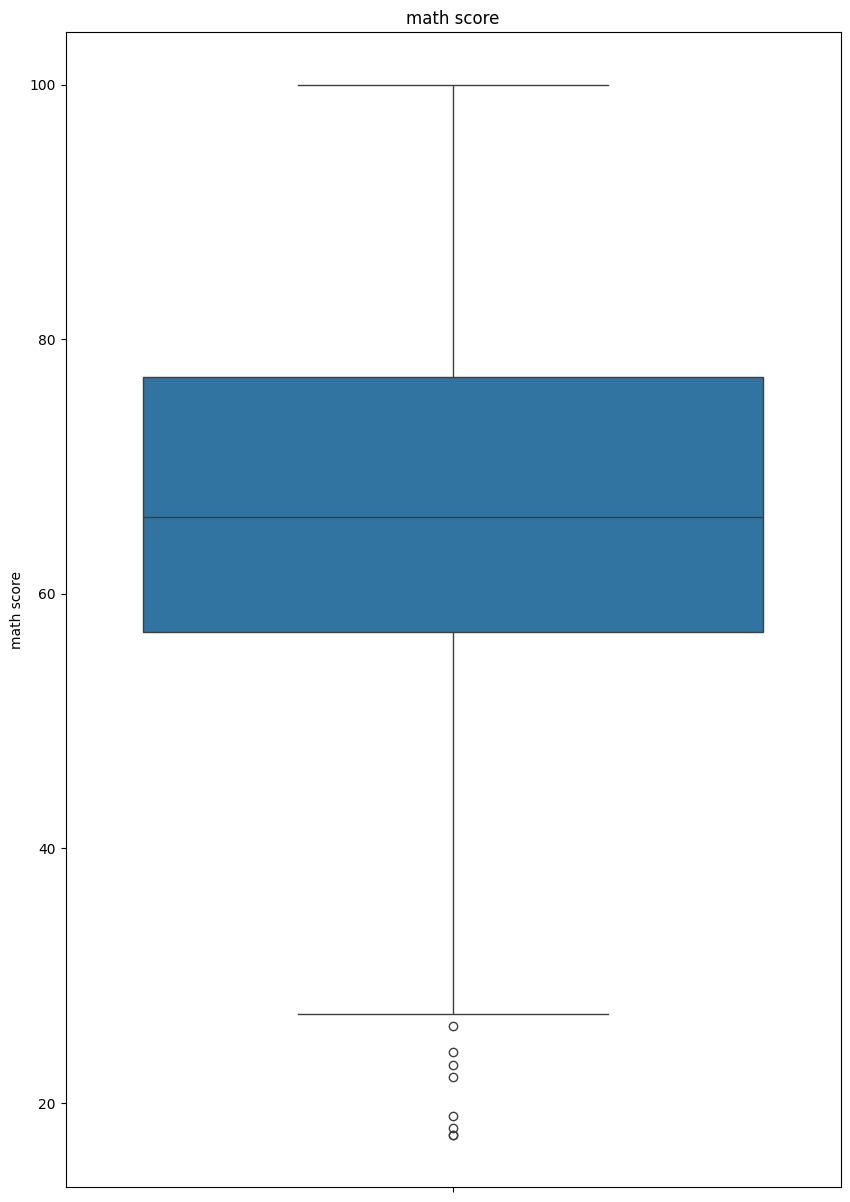

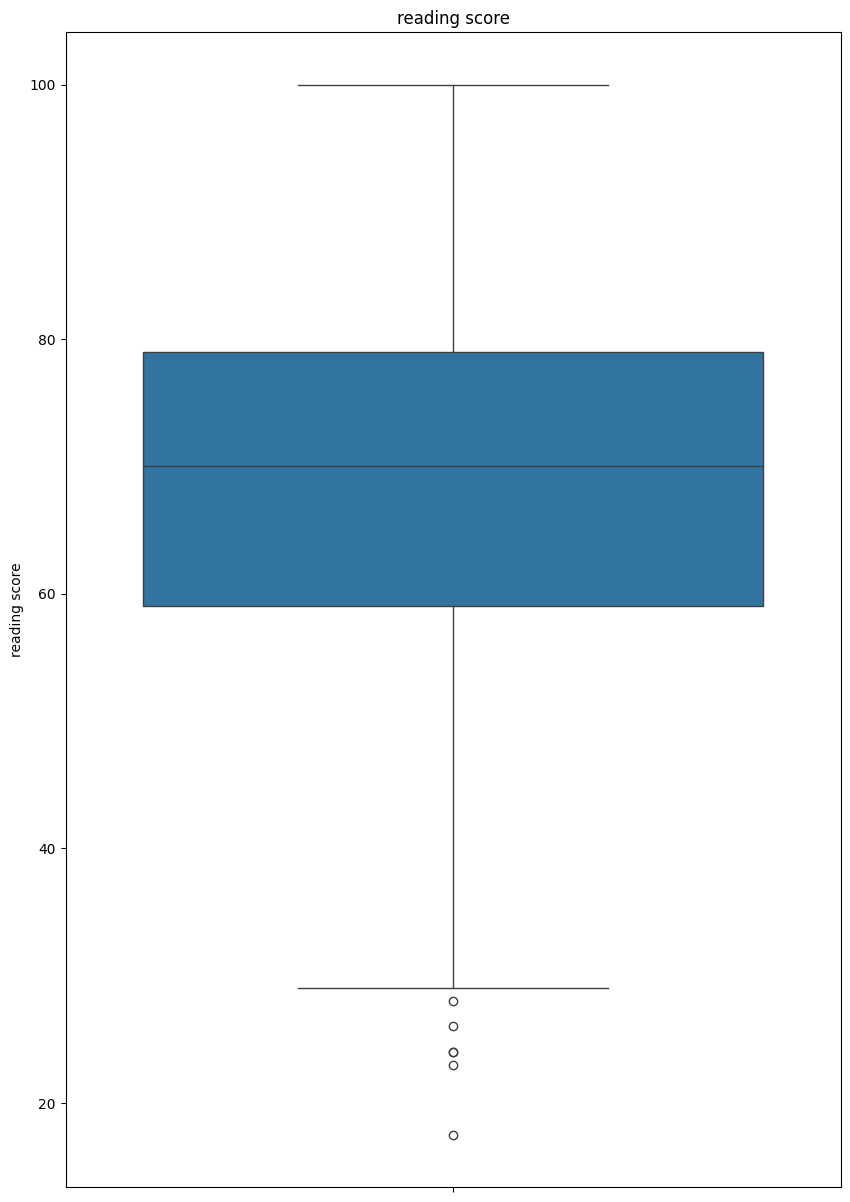

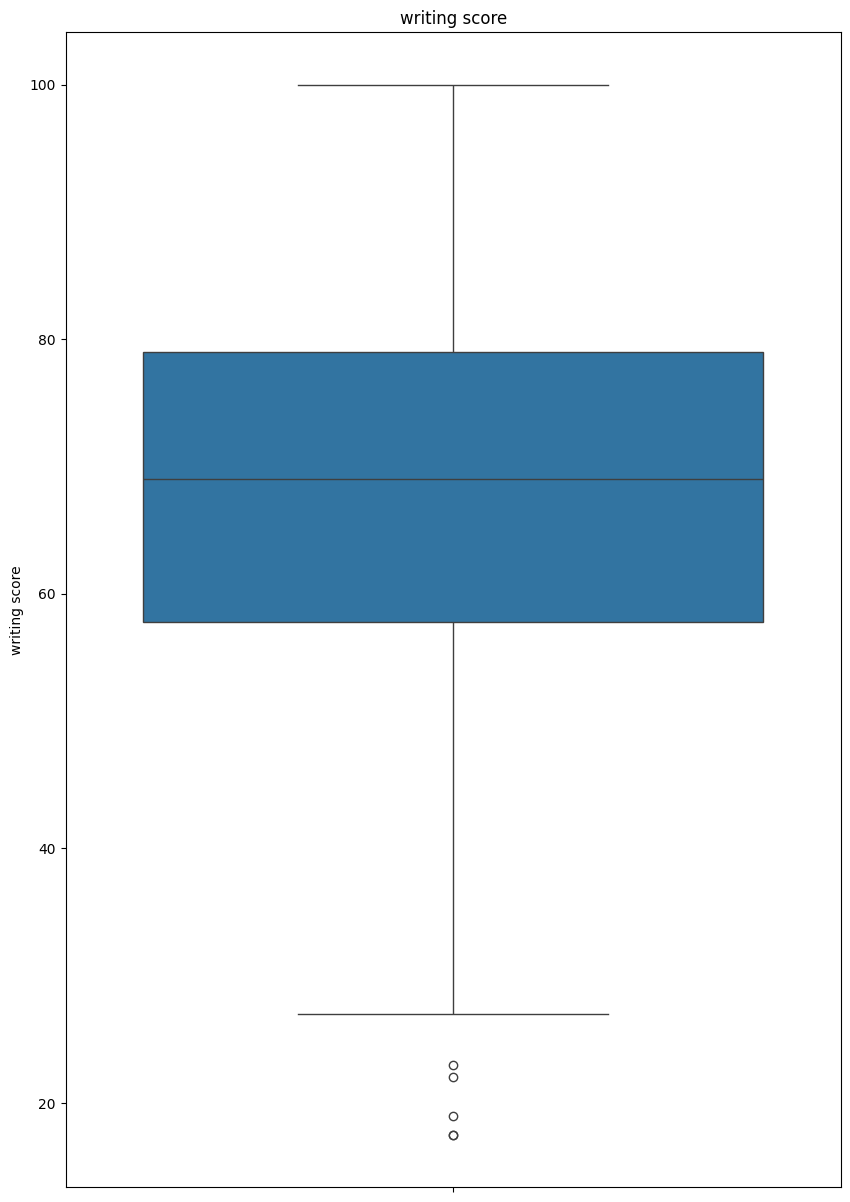

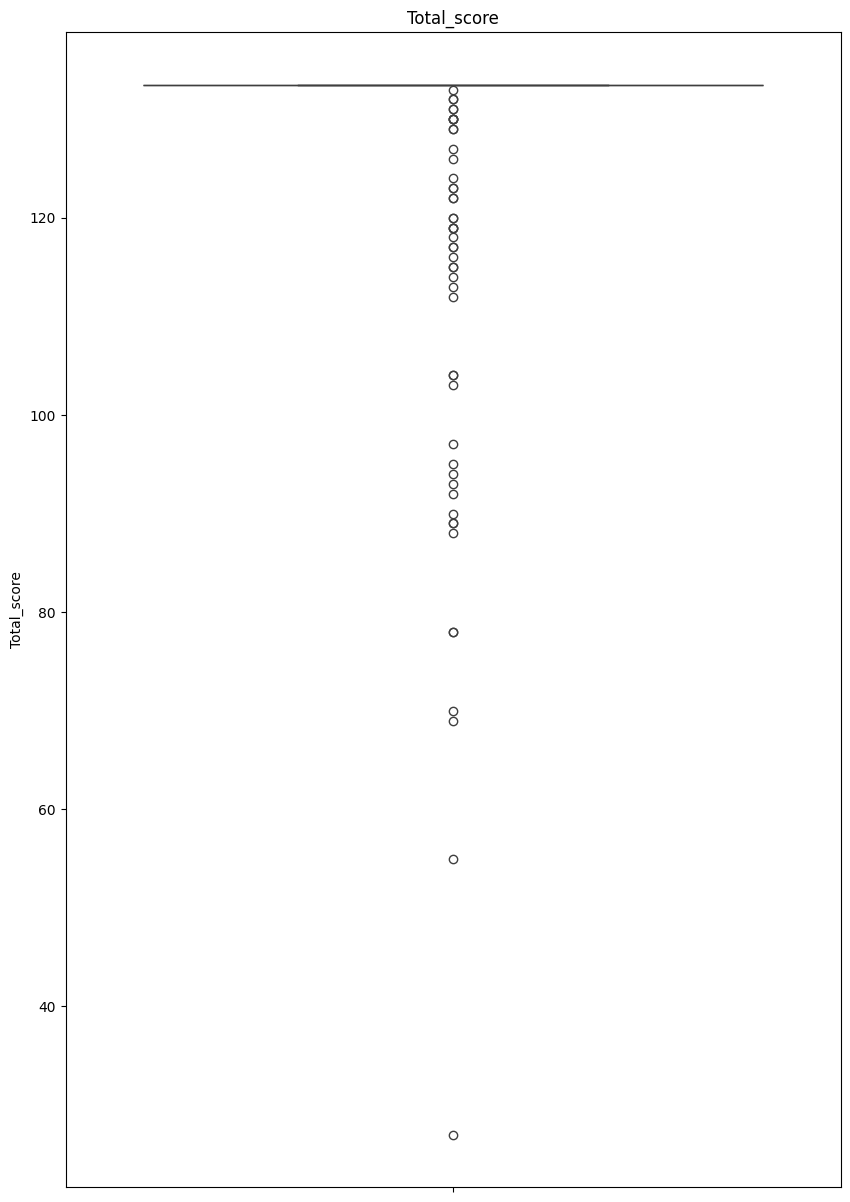

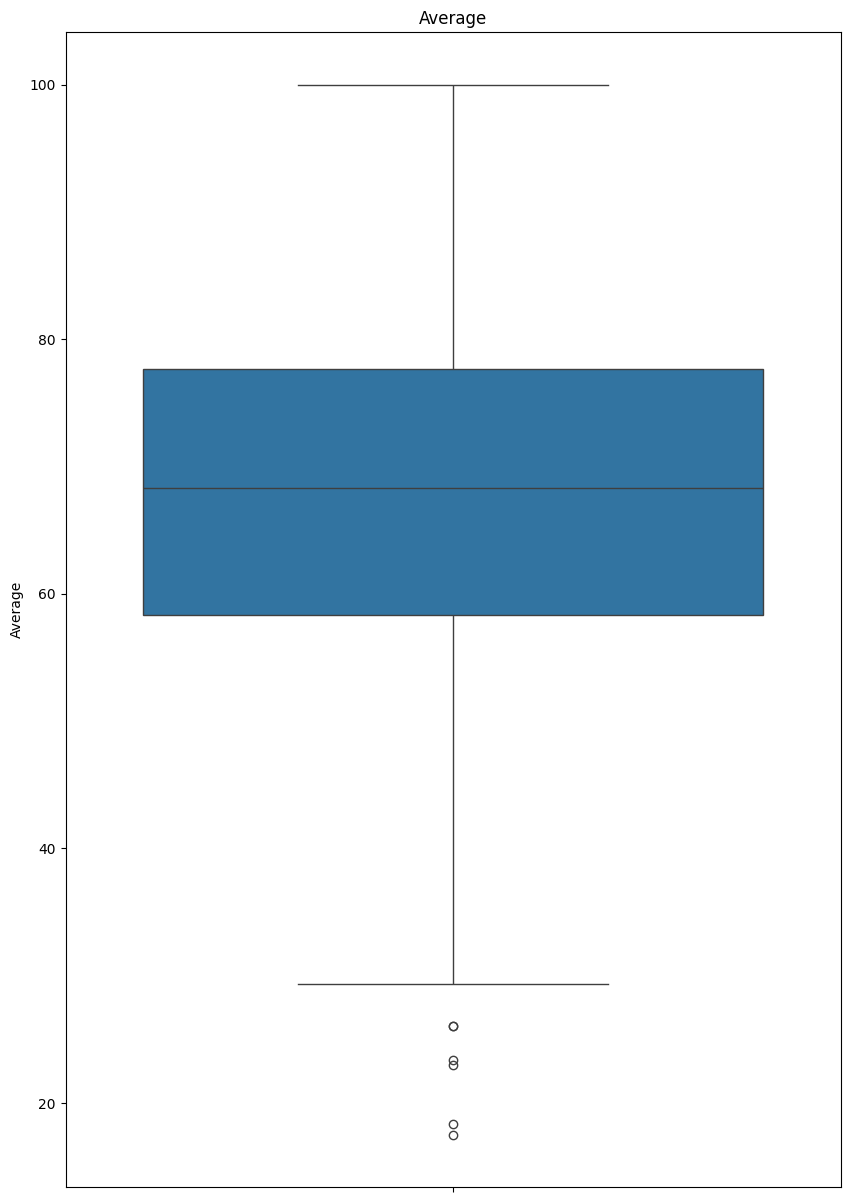

In [63]:
for el in num_data.columns:
    num_data[el]=np.where(num_data[el]>higher_fence,higher_fence,num_data[el])
    num_data[el]=np.where(num_data[el]<lower_fence,lower_fence,num_data[el])
for i in num_data.columns:
    plt.figure(figsize=(10,15))
    plt.title(i)
    sns.boxplot(num_data[i])